In [4]:
txt = """
1suit 45 %

2samesuit 6 %

1rank - 4.2% each in deck
    1specific 4.2 %

2rank - 0.37% each in deck
    2specific 0.1 %
    
gambler's ruin'

if p=0.5 => $p = n1/(n1+n2)$

"""

In [20]:
from card_games import TexasHoldem

In [263]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

suits = ['♠','♣']
ranks = {2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'T',11:'J',12:'Q',13:'K',14:'A'}
hands_list = [sorted([sorted([n+2,(n+i)%13+2], reverse=True) for n in range(13)], reverse=True) for i in range(8)]
hands_list = [[[ranks[h[0]]+suits[0], ranks[h[1]]+suits[1]] for h in l] for l in hands_list]

In [266]:
hands_list[0][0]

['A♠', 'A♣']

In [272]:
x = TexasHoldem()
num_players = 10
num_ranks = 13
num_samples = 1000
factor_dif = len(hands_list)
M = [numpy.zeros(shape=(num_players, num_ranks)) for _ in range(factor_dif)]


for factor in range(factor_dif):
    print(factor/7)
    for nplayer in range(num_players):
        for nrank in range(num_ranks):
            hand = hands_list[factor][nrank]
            count = 0
            my_deck = hand + [h for h in x.cards.deck if h not in hand]
            x.new_game(num_players=nplayer+2, my_deck=my_deck)
            for i in range(num_samples):
                x.shuffle(1)
                w = x.winner()
                if 0 in w[1]:
                    count += 1/len(w[1])
            M[factor][nplayer][nrank] = count/num_samples
print('END!')

0.0
0.14285714285714285
0.2857142857142857
0.42857142857142855
0.5714285714285714
0.7142857142857143
0.8571428571428571
1.0
END!


In [280]:
num_players = 10
num_ranks = 13
N = numpy.ones(shape=(num_players, num_ranks))
for i in range(num_players):
    for j in range(num_ranks):
        N[i][j] = 1/(i+2)

factor: 0


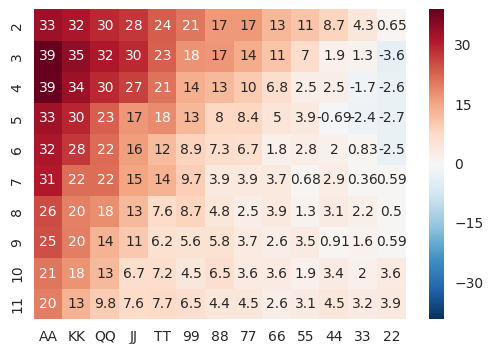

factor: 1


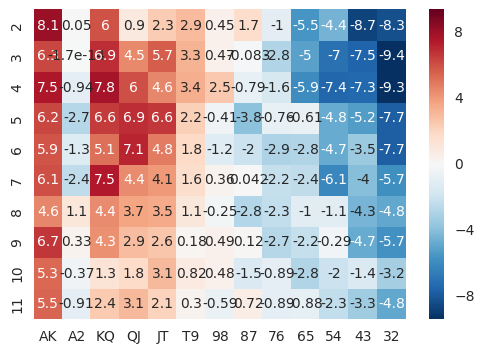

factor: 2


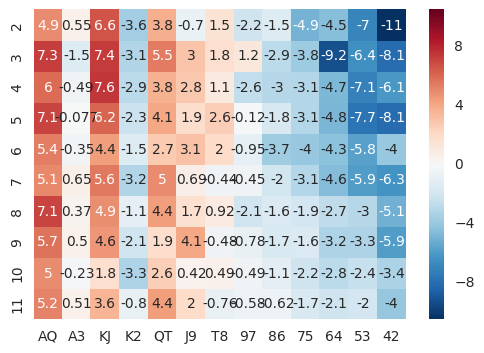

factor: 3


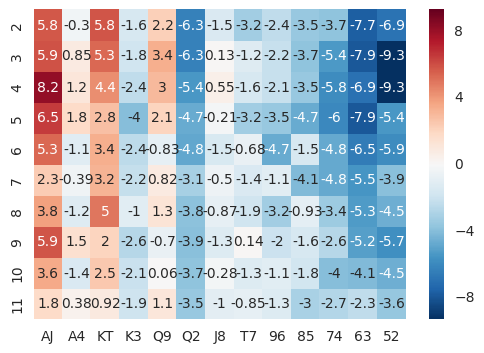

factor: 4


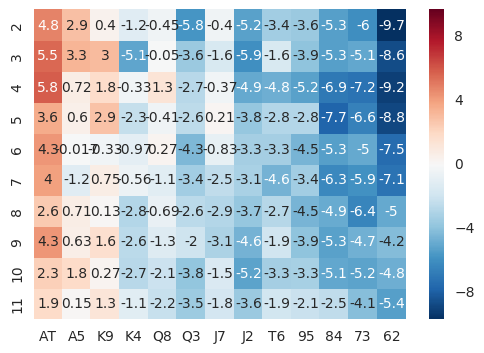

factor: 5


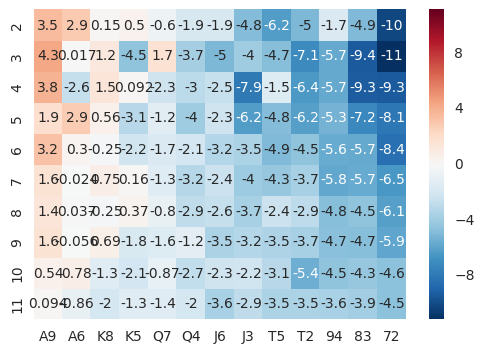

factor: 6


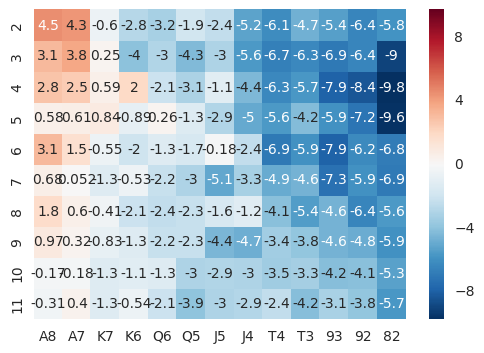

factor: 7


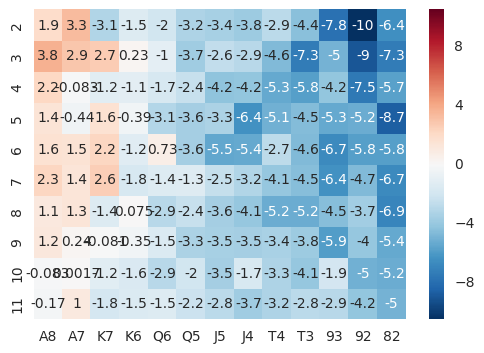

In [281]:
num_players = 10
factor_dif = len(hands_list)
Index= list(range(2,num_players+2))
for factor in range(factor_dif):
    print('factor:', factor)
    hands = hands_list[factor]
    Cols = [i[0][0]+i[1][0] for i in hands]
    df = DataFrame(100*(M[factor]-N), index=Index, columns=Cols)
    sns.heatmap(df.iloc[:,:13], annot=True)
    plt.show()